In [5]:
# General Imports
import numpy as np

# Visualisation Imports
import matplotlib.pyplot as plt

# Scikit Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Qiskit Imports
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit.opflow import StateFn, PauliSumOp, AerPauliExpectation, ListOp, Gradient
from qiskit_machine_learning.kernels import QuantumKernel

from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.neural_networks import CircuitQNN

In [6]:
# Construct teacher and student networks

from qiskit.circuit.library import RealAmplitudes

def student_network_builder(num_qubits):
    circuit = TwoLocal(num_qubits=num_qubits, reps=2, entanglement_blocks='cx', entanglement='linear', rotation_blocks=['ry'], insert_barriers=True).decompose()
    
    return circuit

student_network = student_network_builder(3)
print(student_network)



     ┌──────────┐ ░            ░ ┌──────────┐ ░            ░ ┌──────────┐
q_0: ┤ Ry(θ[0]) ├─░───■────────░─┤ Ry(θ[3]) ├─░───■────────░─┤ Ry(θ[6]) ├
     ├──────────┤ ░ ┌─┴─┐      ░ ├──────────┤ ░ ┌─┴─┐      ░ ├──────────┤
q_1: ┤ Ry(θ[1]) ├─░─┤ X ├──■───░─┤ Ry(θ[4]) ├─░─┤ X ├──■───░─┤ Ry(θ[7]) ├
     ├──────────┤ ░ └───┘┌─┴─┐ ░ ├──────────┤ ░ └───┘┌─┴─┐ ░ ├──────────┤
q_2: ┤ Ry(θ[2]) ├─░──────┤ X ├─░─┤ Ry(θ[5]) ├─░──────┤ X ├─░─┤ Ry(θ[8]) ├
     └──────────┘ ░      └───┘ ░ └──────────┘ ░      └───┘ ░ └──────────┘


# Student Circuit validate

In [10]:
weights = [ 2.8131, -0.6038, -1.5985,  0.1035, -3.0277, -0.0254, -0.0591, -1.3483,
         1.5391]

# Test histogram

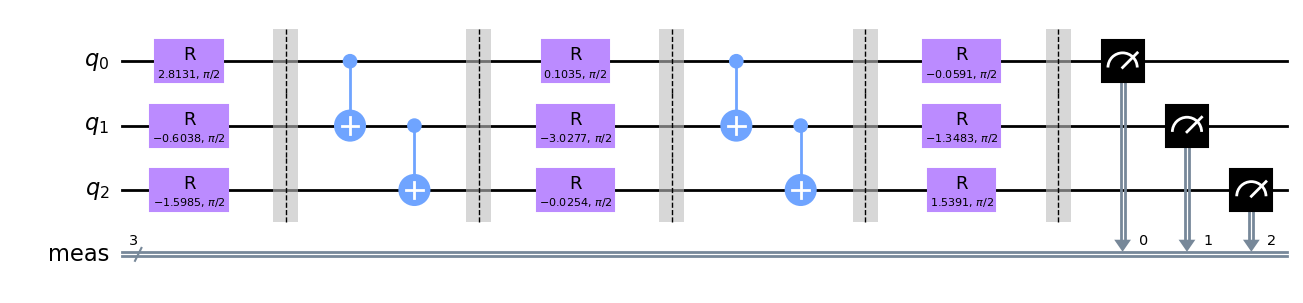

In [11]:
qc3 = QuantumCircuit(3)
qc=qc3.compose(student_network)
qc.assign_parameters(weights, inplace=True)

qc.measure_all()
qc.decompose().draw(output='mpl')

{'001': 608, '101': 1, '010': 2, '000': 38, '011': 375}


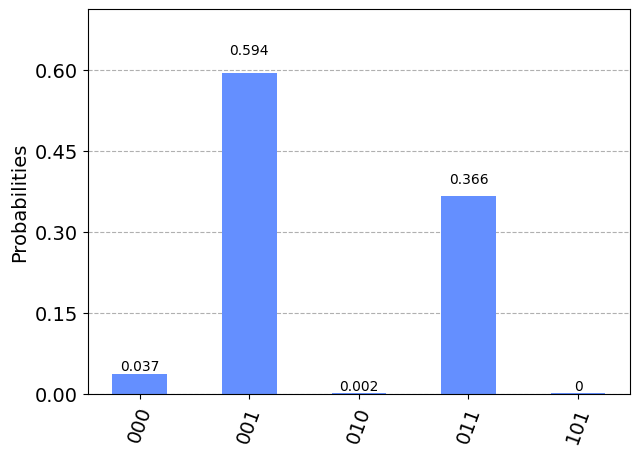

In [12]:
#choosing the qasm simulator backend

from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')

# running the job and getting results (counts)
job = execute(qc, backend, shots=1024) # shots = no. of times you want to run the experiment
result = job.result()
counts = result.get_counts(qc)

#printing and visualizing results (histogram data of experiment)
print(counts)
plot_histogram(counts)